<a href="https://colab.research.google.com/github/hhijo/Diabetes_app/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading data
data=pd.read_csv("/content/diabetes.csv")


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data.shape

(768, 9)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame
scaler = MinMaxScaler()
columns_to_normalize = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.743719,0.590164,0.353535,0,0.500745,0.234415,0.483333,1
1,1,0.427136,0.540984,0.292929,0,0.396423,0.116567,0.166667,0
2,8,0.919598,0.524590,0.000000,0,0.347243,0.253629,0.183333,1
3,1,0.447236,0.540984,0.232323,94,0.418778,0.038002,0.000000,0
4,0,0.688442,0.327869,0.353535,168,0.642325,0.943638,0.200000,1


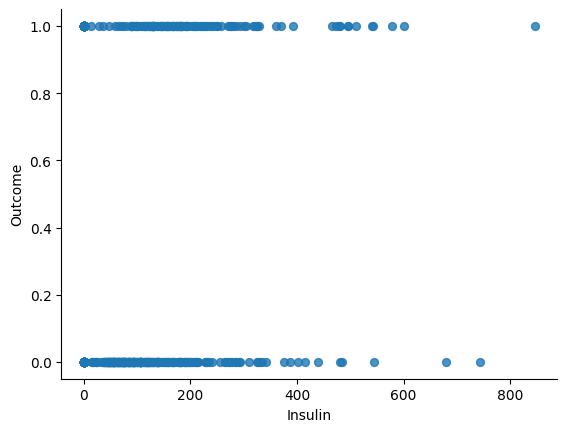

In [ ]:
# Scatter plot
data.plot(kind='scatter', x="Insulin", y="Outcome", s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#checking if there is missing data
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
#Creating x and y values: X being the indepedent variable and y being the dependant variable

x=data[["Insulin"]]
y=data[["Outcome"]]

In [ ]:
#creating the model
model=linear_model.LinearRegression()


In [ ]:
#splitting the data into 70% training and 30% testing
x_train,x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(537, 1)
(537, 1)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(231, 1)
(231, 1)


In [ ]:
#training the model

model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

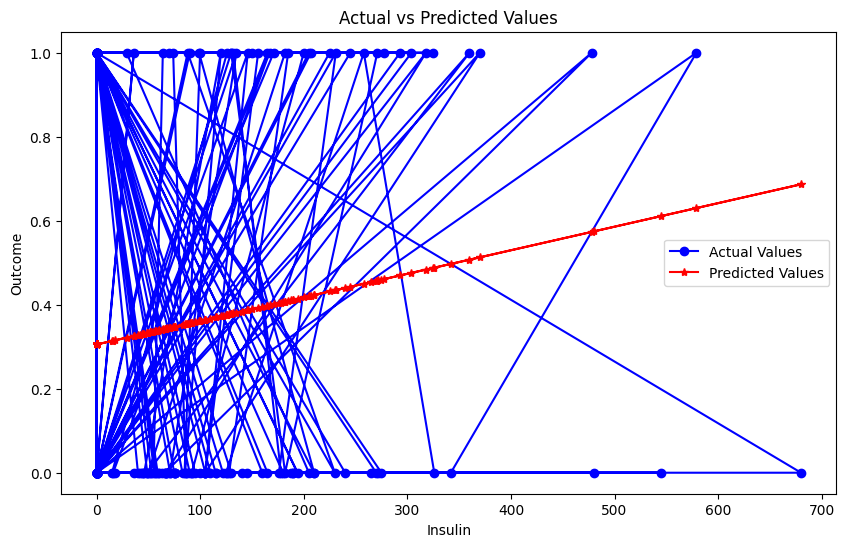

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label='Actual Values', color='blue', marker='o')

# Plot predicted values
plt.plot(x_test, y_pred, label='Predicted Values', color='red', marker='*')

# Set labels and title
plt.xlabel('Insulin')
plt.ylabel('Outcome')
plt.title('Actual vs Predicted Values')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
model.intercept_

array([0.30531081])

In [ ]:
model.coef_

array([[0.00056093]])

In [ ]:
predicted_Outcome= model.predict([[12]])
print(predicted_Outcome)

[[0.31204194]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("Mean squared error")
print(mean_squared_error(y_test,y_pred))
print("R_squared")
print(r2_score(y_test,y_pred))
print("Mean absolute error")
print(mean_absolute_error(y_test,y_pred))
print("Root Mean squared error")
print(mean_squared_error(y_test, y_pred,squared=False))

Mean squared error
0.22323095288635159
R_squared
0.013921616144982552
Mean absolute error
0.44655164246503626
Root Mean squared error
0.4724732298092153


In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
data_diabetes=pd.read_csv("/content/diabetes.csv")

In [ ]:
#Displaying a few rows
data_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame
scaler = MinMaxScaler()
columns_to_normalize = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.743719,0.590164,0.353535,0,0.500745,0.234415,0.483333,1
1,1,0.427136,0.540984,0.292929,0,0.396423,0.116567,0.166667,0
2,8,0.919598,0.524590,0.000000,0,0.347243,0.253629,0.183333,1
3,1,0.447236,0.540984,0.232323,94,0.418778,0.038002,0.000000,0
4,0,0.688442,0.327869,0.353535,168,0.642325,0.943638,0.200000,1


In [ ]:
#Seperating the x and the y variables and converting them to numpy array
X=data_diabetes.drop(columns=["Outcome","Insulin"])
y=data_diabetes['Outcome']
X=X.to_numpy()
y=y.to_numpy()

In [ ]:
#Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model=LogisticRegression()

In [ ]:
#Training the model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Testing the model using the test data
y_pred=model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:",conf_matrix)
print("Class report:", class_report)

Accuracy: 0.7359307359307359
Confusion matrix: [[120  31]
 [ 30  50]]
Class report:               precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Get predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate area under the curve
area_under_curve = auc(recall, precision)

print("Area Under Precision-Recall Curve:", area_under_curve)

Area Under Precision-Recall Curve: 0.6563569045692675


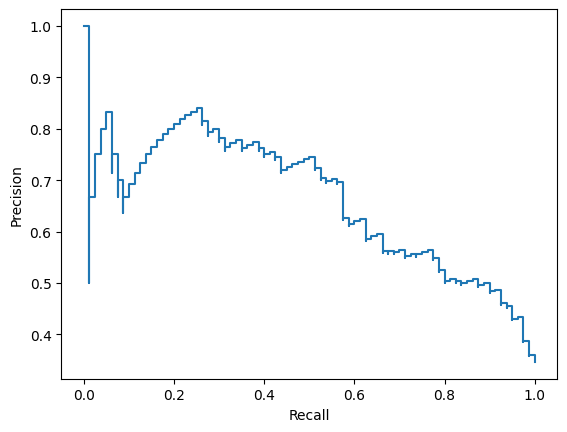

Area Under Precision-Recall Curve: 0.6563569045692675


In [ ]:
from sklearn.metrics import precision_recall_curve, auc, PrecisionRecallDisplay

# Assuming 'model' is your fitted logistic regression model and 'X_test', 'y_test' are your test data
y_pred_proba = model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
area_under_curve = auc(recall, precision)

disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()
print("Area Under Precision-Recall Curve:", area_under_curve)